In [21]:
import pandas as pd
import tweepy
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, seaborn as sns


# Data wrangling

## Gathering Data

In [31]:
#import archive file
df_archive=pd.read_csv('twitter-archive-enhanced.csv')


In [3]:
#download image prediction file using request library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open ('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
df_image = pd.read_csv('image_predictions.tsv', sep = '\t')


In [5]:
#Gather data using tweepy
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)



In [8]:
# query the api using tweet_id of archive file


with open('tweet_json.txt', 'w') as Jfile:
    for i, tweet_id in df_archive.tweet_id.items():
        try:
            print("%s# %s" % (str(i+1), tweet_id))
            tweet = api.get_status(tweet_id,tweet_mode = 'extended')
            json.dump(tweet._json,Jfile)
            Jfile.write('\n')
        except tweepy.TweepError as e:
            print(e)
            

1# 892420643555336193
2# 892177421306343426
3# 891815181378084864
4# 891689557279858688
5# 891327558926688256
6# 891087950875897856
7# 890971913173991426
8# 890729181411237888
9# 890609185150312448
10# 890240255349198849
11# 890006608113172480
12# 889880896479866881
13# 889665388333682689
14# 889638837579907072
15# 889531135344209921
16# 889278841981685760
17# 888917238123831296
18# 888804989199671297
19# 888554962724278272
20# 888202515573088257
[{'code': 144, 'message': 'No status found with that ID.'}]
21# 888078434458587136
22# 887705289381826560
23# 887517139158093824
24# 887473957103951883
25# 887343217045368832
26# 887101392804085760
27# 886983233522544640
28# 886736880519319552
29# 886680336477933568
30# 886366144734445568
31# 886267009285017600
32# 886258384151887873
33# 886054160059072513
34# 885984800019947520
35# 885528943205470208
36# 885518971528720385
37# 885311592912609280
38# 885167619883638784
39# 884925521741709313
40# 884876753390489601
41# 884562892145688576
42# 88

In [4]:
#save the json data to dataframe
df_tweet = []
with open('tweet_json.txt', 'r') as Jfile2:
    for line in Jfile2:
        tweet2 = json.loads(line)
        df_tweet.append({'tweet_id': tweet2['id'],
                        'retweet_count': tweet2['retweet_count'],
                        'favorite_count': tweet2['favorite_count'],
                       })

df_tweet = pd.DataFrame(df_tweet, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

## Assessing Data

In [5]:
# assess df_archive
df_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [6]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
sum(df_archive['tweet_id'].duplicated())

0

In [8]:
sum(df_archive['text'].duplicated())

0

In [9]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [113]:
df_archive[df_archive['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [10]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [143]:
pd.set_option('display.max_colwidth', -1) 

df_archive[df_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
          

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


In [14]:
#tweets that have more than 1 dog type
df_archive[((df_archive['doggo']!='None').astype(int)+(df_archive['floofer']!='None').astype(int) +(df_archive['pupper']!='None').astype(int)+(df_archive['puppo']!='None').astype(int))>1]   



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


In [15]:
df_archive.in_reply_to_status_id.notnull().sum()

78

In [16]:
df_archive.retweeted_status_id.notnull().sum()

181

In [17]:
# assess df_image
df_image.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [18]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [68]:
sum(df_image.tweet_id.duplicated())

0

In [69]:
df_image.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
web_site                      19
Maltese_dog                   18
Eskimo_dog                    18
teddy                         18
Shetland_sheepdog             18
beagle                        18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [70]:
df_image.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [72]:
df_image[df_image.p1_dog == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,Chihuahua,8.695060e-02,True


In [19]:
# assess df_tweet
df_tweet.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8162,37471


In [20]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
tweet_id          2337 non-null int64
retweet_count     2337 non-null int64
favorite_count    2337 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


### Quality

df_image:

    1. Remove rows that p1_dog is not true since we only want to analyse dog's ratings.
    2. Rename column p1 and p1_conf.
    3. Only keep tweet_id, p1 and p1_config, and remove other columns.
    
df_archive:

    4. Delete retweet and reply tweets.
    5. Some rating denominators are not 10.
    6. Some rating numerators are not correct since some numerators are with decimals.
    7. Some tweets contains doge stage more than one type.
    8. Drop tweet ids that are not in df_image.
    9. Drop columns: text, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and rating_denominator.


### Tidiness

df_archive:

    1. Combine columns of doggo, floofer, pupper and puppo.
    2. 3 tables should be able to join each others using primary key.

## Cleaning Data

### Quality

In [76]:
# make a copy of archive data
df_copy_arc = df_archive.copy()

In [90]:
# make a copy of image prediction data
df_copy_img = df_image.copy()

1. Remove rows that p1_dog (from image prediction table) is not true since we only want to analyse dog's ratings.

In [91]:
# code:
df_copy_img = df_copy_img[df_copy_img['p1_dog'] == True]

In [92]:
# test:
sum(df_copy_img['p1_dog'] == False)

0

2. Rename column p1 and p1_conf in df_copy img.

In [93]:
# code:
df_copy_img.rename(columns= {'p1':'predicted_dog_type', 'p1_conf':'prediction_confidence'}, inplace=True)

In [94]:
# test:
df_copy_img.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id                 1532 non-null int64
jpg_url                  1532 non-null object
img_num                  1532 non-null int64
predicted_dog_type       1532 non-null object
prediction_confidence    1532 non-null float64
p1_dog                   1532 non-null bool
p2                       1532 non-null object
p2_conf                  1532 non-null float64
p2_dog                   1532 non-null bool
p3                       1532 non-null object
p3_conf                  1532 non-null float64
p3_dog                   1532 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 124.2+ KB


3. Only keep tweet_id, predicted_dog_type and prediction_confidence, and remove other columns of df_copy_img table.

In [100]:
# code:
df_copy_img=df_copy_img[['tweet_id','predicted_dog_type','prediction_confidence']]
            

In [105]:
# test:
df_copy_img.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 3 columns):
tweet_id                 1532 non-null int64
predicted_dog_type       1532 non-null object
prediction_confidence    1532 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 47.9+ KB


4. Delete rows that are not original tweets in archive table.

In [106]:
# code:
df_copy_arc=df_copy_arc[(df_copy_arc['retweeted_status_id'].isnull()) & (df_copy_arc['in_reply_to_status_id'].isnull() )]


In [108]:
# test:
sum((df_copy_arc['retweeted_status_id'].isnull() & df_copy_arc['in_reply_to_status_id'].isnull()) == False)


0

5. Some rating denominators are not 10. Drop these rows


In [109]:
df_copy_arc.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [115]:
# code:
df_copy_arc = df_copy_arc[df_copy_arc['rating_denominator'] == 10]

In [117]:
# test:
sum(df_copy_arc['rating_denominator'] != 10)

0

6. Some rating numerators are not correct since some numerators are with decimals.

In [139]:
# code: 
pd.set_option('display.max_colwidth', -1) 

df_copy_arc[df_copy_arc['text'].str.contains(r"(\d+\.\d*\/\d+)")]

df_copy_arc.loc[(df_copy_arc.tweet_id == 883482846933004288), 'rating_numerator'] = 14
df_copy_arc.loc[(df_copy_arc.tweet_id == 786709082849828864), 'rating_numerator'] = 10
df_copy_arc.loc[(df_copy_arc.tweet_id == 778027034220126208), 'rating_numerator'] = 11
df_copy_arc.loc[(df_copy_arc.tweet_id == 680494726643068929), 'rating_numerator'] = 11



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


In [142]:
# test:
df_copy_arc[df_copy_arc['text'].str.contains(r"(\d+\.\d*\/\d+)")]



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",14,10,Bella,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,10,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11,10,Sophie,None,None,pupper,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11,10,None,None,None,None,None


7. Some tweets contains doge stage more than one type. Drop those rows.

In [149]:
# code:
index = df_copy_arc[((df_copy_arc['doggo']!='None').astype(int)+(df_archive['floofer']!='None').astype(int) +(df_archive['pupper']!='None').astype(int)+(df_archive['puppo']!='None').astype(int))>1].index
index
df_copy_arc.drop(index , inplace=True)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [150]:
# test:
sum(((df_copy_arc['doggo']!='None').astype(int)+(df_archive['floofer']!='None').astype(int) +(df_archive['pupper']!='None').astype(int)+(df_archive['puppo']!='None').astype(int))>1)



0

8. Drop tweet ids that are not in df_image.

In [156]:
# code:
df_copy_arc = pd.merge(df_copy_arc, df_copy_img, on='tweet_id')

In [193]:
# test:
error_list = []

for a in df_copy_arc.tweet_id:
    x=0
    for b in df_copy_img.tweet_id:
        if (a == b):
            x=1
            break
    if (x==0):
        error_list.append(a)
    
error_list

[]

9. Drop columns: text, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and rating_denominator	.

In [207]:
# code:
df_copy_arc = df_copy_arc.drop(['text','in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'rating_denominator'], axis=1)


In [208]:
# test:

df_copy_arc.head(1)

,tweet_id,timestamp,source,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo,predicted_dog_type,prediction_confidence
0,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,Tilly,None,None,None,None,Chihuahua,0.323581


### Tidiness

1.Combine columns of doggo, floofer, pupper and puppo.

In [215]:
# code:
df_copy_arc['stage'] = df_copy_arc[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

df_copy_arc = df_copy_arc.drop(['doggo','floofer', 'pupper', 'puppo'], axis=1)



In [224]:
# test:
df_copy_arc.head(1)


,tweet_id,timestamp,source,expanded_urls,rating_numerator,name,predicted_dog_type,prediction_confidence,stage
0,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,Tilly,Chihuahua,0.323581,None


In [226]:
# test 2:
df_copy_arc.stage.value_counts()

None       1222
pupper     144 
doggo      48  
puppo      19  
floofer    7   
Name: stage, dtype: int64

2. 3 tables should be able to join each others using primary key. left join df_tweet to df_copy_arc.

In [233]:
# code:
df_final = pd.merge(df_copy_arc, df_tweet, on='tweet_id', how = 'left')

In [234]:
# test:

df_final.head(1)

,tweet_id,timestamp,source,expanded_urls,rating_numerator,name,predicted_dog_type,prediction_confidence,stage,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,Tilly,Chihuahua,0.323581,None,6040.0,32208.0


# Storing Data

In [235]:
df_final.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)


# Analyzing and Visualizing Data 

In [22]:
df_ana = pd.read_csv('twitter_archive_master.csv')

### Insight 1: 

The Top 10 most common breeds in this datasets.

In [23]:
# group by breed, calculated total counts, rating means, retweet means by each breed.
df_groupby_breed=df_ana.groupby('predicted_dog_type').agg({'tweet_id':'count','rating_numerator':'mean', 'retweet_count':'mean','favorite_count':'mean'}).rename(columns={'tweet_id':'dog_count'})       


In [24]:
# top 10 common breeds of this dataset
df_top10 = df_groupby_breed.sort_values('dog_count',  ascending=False).head(10)
df_top10

,dog_count,rating_numerator,retweet_count,favorite_count
predicted_dog_type,,,,
golden_retriever,130,11.623077,3301.084615,11606.676923
Labrador_retriever,91,11.131868,3639.483146,11327.460674
Pembroke,88,11.443182,2978.795455,10909.818182
Chihuahua,78,10.692308,2706.243590,8504.782051
pug,54,10.240741,1694.962963,5595.833333
chow,41,11.609756,2692.414634,9577.292683
Samoyed,40,11.700000,4183.076923,12721.307692
Pomeranian,38,11.157895,2657.289474,7727.105263
toy_poodle,37,11.054054,2330.594595,6385.189189


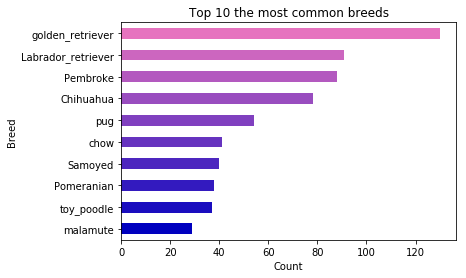

In [25]:
# visualize top 10 breeds
colors = [(x/10.0, x/20.0, 0.75) for x in range(10)]

df_top10.sort_values('dog_count')['dog_count'].plot(kind = 'barh', color=colors)
plt.xlabel('Count')
plt.ylabel('Breed')
plt.title('Top 10 the most common breeds')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

In [10]:
# proportion of golden retriever
df_ana[df_ana['predicted_dog_type']=='golden_retriever'].shape[0]/df_ana.shape[0]

0.09027777777777778

### Insight 2:

The Top 10 breeds that have the highest ratings.

In [26]:
df_top10_rating = df_groupby_breed.sort_values('rating_numerator',  ascending=False).head(10)

df_top10_rating

,dog_count,rating_numerator,retweet_count,favorite_count
predicted_dog_type,,,,
Saluki,4,12.500000,4769.000000,22921.500000
briard,3,12.333333,2751.333333,8972.333333
Tibetan_mastiff,4,12.250000,3871.250000,11459.250000
Border_terrier,7,12.142857,3144.428571,12868.714286
silky_terrier,1,12.000000,1734.000000,6909.000000
standard_schnauzer,1,12.000000,845.000000,1917.000000
Eskimo_dog,18,11.777778,5091.388889,14039.166667
Irish_setter,4,11.750000,3124.250000,9983.500000
Gordon_setter,4,11.750000,2301.000000,5184.000000


In [42]:
df_bottom10_rating = df_groupby_breed.sort_values('rating_numerator',  ascending=True).head(10)

df_bottom10_rating


,dog_count,rating_numerator,retweet_count,favorite_count
predicted_dog_type,,,,
Japanese_spaniel,1,5.00,428.000000,1262.000000
soft-coated_wheaten_terrier,8,8.25,683.500000,1916.625000
curly-coated_retriever,2,9.00,255.000000,907.000000
Norwich_terrier,4,9.00,1611.250000,5688.750000
Scotch_terrier,1,9.00,1154.000000,3389.000000
Walker_hound,5,9.00,2459.600000,6189.600000
Welsh_springer_spaniel,3,9.00,477.000000,2583.333333
Ibizan_hound,3,9.00,396.666667,1049.333333
Tibetan_terrier,4,9.25,514.000000,1728.750000


In [ ]:
pd.set_option('display.max_colwidth', -1) 
df_ana[df_ana['predicted_dog_type']=='Japanese_spaniel']
#df_archive[df_archive['tweet_id']==686730991906516992]


### Insight 3:

Correlation between the commoness of breeds and ratings.

In [25]:
df_cor = df_groupby_breed.copy()


In [26]:
# reset index of df_cor table
df_cor = df_cor['dog_count'].reset_index()

In [28]:
# left join grouped table with original df_ana table, so that the original table has amount level.
df_ana_cor = pd.merge(df_ana, df_cor, on='predicted_dog_type', how = 'left')

In [29]:
# relationship between ratings and dog_count_bin
import statsmodels.api as sm
df_ana_cor['intercept'] = 1

In [30]:
model = sm.OLS(df_ana_cor['rating_numerator'],df_ana_cor[['intercept','dog_count']])

In [31]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       rating_numerator   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     42.93
Date:                Thu, 13 Jun 2019   Prob (F-statistic):           7.89e-11
Time:                        21:54:56   Log-Likelihood:                -2770.6
No. Observations:                1440   AIC:                             5545.
Df Residuals:                    1438   BIC:                             5556.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.6175      0.063    169.028      0.000      10.494      10.741
dog_count      0.0072      0.001      6.552      0.000       0.005       0.009
==============================================================================
Omnibus:                      279.671   Durbin-Watson:                   1.303
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              637.005
Skew:                          -1.076   Prob(JB):                    4.74e-139
Kurtosis:                       5.446   Cond. No.                         82.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5,1,'relationship between ratings and amount level')

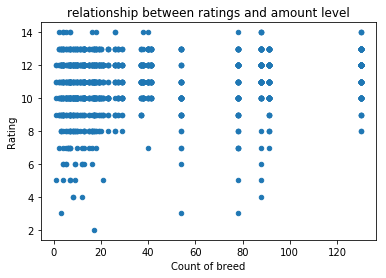

In [35]:

df_ana_cor.plot(x='dog_count', y='rating_numerator', kind='scatter')
plt.xlabel('Count of breed')
plt.ylabel('Rating')
plt.title('relationship between ratings and amount level')


### Insight 4:


In [66]:
# only inclue no missing value in favorite count and retweet count
df = df_ana_cor[df_ana_cor['favorite_count'].notnull() & df_ana_cor['retweet_count'].notnull()]

Text(0.5,1,'relationship ratings and favorite counts')

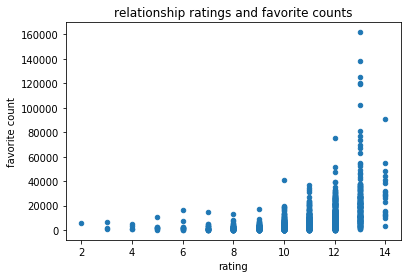

In [84]:
df.plot(x='rating_numerator', y='favorite_count', kind='scatter')
plt.xlabel('rating')
plt.ylabel('favorite count')
plt.title('relationship ratings and favorite counts')

In [85]:
model3 = sm.OLS(df['favorite_count'],df[['intercept','rating_numerator']])

In [86]:
results = model3.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     334.7
Date:                Thu, 13 Jun 2019   Prob (F-statistic):           2.33e-67
Time:                        22:47:14   Log-Likelihood:                -15486.
No. Observations:                1436   AIC:                         3.098e+04
Df Residuals:                    1434   BIC:                         3.099e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept        -2.768e+04   2024.312    -13.675      0.000   -3.17e+04   -2.37e+04
rating_numerator  3354.6770    183.378     18.294      0.000    2994.959    3714.395
==============================================================================
Omnibus:                     1524.181   Durbin-Watson:                   1.585
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           120041.110
Skew:                           5.103   Prob(JB):                         0.00
Kurtosis:                      46.613   Cond. No.                         73.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""